In [1]:
#importing libraries and packages
import numpy as num
import pandas as pds
import matplotlib.pyplot as mpl
import seaborn as sbn

In [2]:
#DATASET
#loading the dataset
zom_og=pds.read_csv("zomato.csv")
zom_og.head() 

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
#summary of the data 
zom_og.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
#DATA CLEANING
#deleting unwanted columns such as dishliked,url,phone
zom_new=zom_og.drop(['url','dish_liked','phone'],axis=1)

#removing the duplicate values
zom_new.duplicated().sum()
zom_new.drop_duplicates(inplace=True)

#removing the nan and null values from our data
zom_new.isnull().sum()
zom_new.dropna(how='any',inplace=True)
zom_new.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

In [5]:
#checking the columns left
zom_new.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
#changing the column names
zom_new = zom_new.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
zom_new.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [7]:
#changing the datatype for cost
zom_new['cost'] = zom_new['cost'].astype(str) #Changing the cost to string
zom_new['cost'] = zom_new['cost'].apply(lambda x: x.replace(',','.')) #Using lambda function to replace ',' from cost
zom_new['cost'] = zom_new['cost'].astype(float) # Changing the cost to Float
zom_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [8]:
#displaying and checking the rate column of data
zom_new['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [9]:
#removing '/5' from rates
zom_new = zom_new.loc[zom_new.rate !='NEW']
zom_new = zom_new.loc[zom_new.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == num.str else x
zom_new.rate = zom_new.rate.apply(remove_slash).str.strip().astype('float')
zom_new['rate'].head()

C:\Users\Hitesh\AppData\Local\Temp/ipykernel_13148/374424897.py:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  remove_slash = lambda x: x.replace('/5', '') if type(x) == num.str else x


0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [10]:
# Adjusting the column names
zom_new.name = zom_new.name.apply(lambda x:x.title())
zom_new.online_order.replace(('Yes','No'),(True, False),inplace=True)
zom_new.book_table.replace(('Yes','No'),(True, False),inplace=True)
zom_new.cost.unique()

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 900.  , 200.  , 750.  , 150.  , 850.  , 100.  ,   1.2 ,
       350.  , 250.  , 950.  ,   1.  ,   1.5 ,   1.3 , 199.  ,   1.1 ,
         1.6 , 230.  , 130.  ,   1.7 ,   1.35,   2.2 ,   1.4 ,   2.  ,
         1.8 ,   1.9 , 180.  , 330.  ,   2.5 ,   2.1 ,   3.  ,   2.8 ,
         3.4 ,  50.  ,  40.  ,   1.25,   3.5 ,   4.  ,   2.4 ,   2.6 ,
         1.45,  70.  ,   3.2 , 240.  ,   6.  ,   1.05,   2.3 ,   4.1 ,
       120.  ,   5.  ,   3.7 ,   1.65,   2.7 ,   4.5 ,  80.  ])

In [11]:
#Encoding the input Variables
def Encode(zom_new):
    for column in zom_new.columns[~zom_new.columns.isin(['rate', 'cost', 'votes'])]:
        zom_new[column] = zom_new[column].factorize()[0]
    return zom_new

zom_en = Encode(zom_new.copy())

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

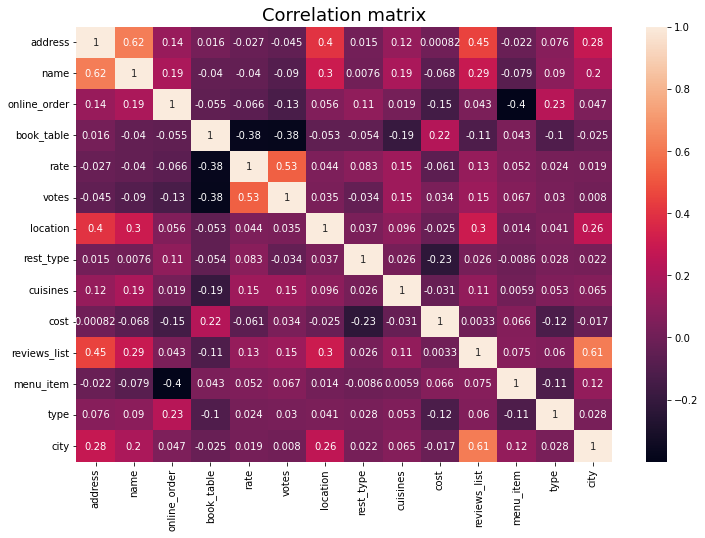

In [12]:
#correlation matrix for variables
corr = zom_en.corr(method='kendall')
mpl.figure(figsize=(12,8))
sbn.heatmap(corr, annot=True)
mpl.title('Correlation matrix',fontsize=18)
mpl.savefig("correlation.png")
zom_en.columns

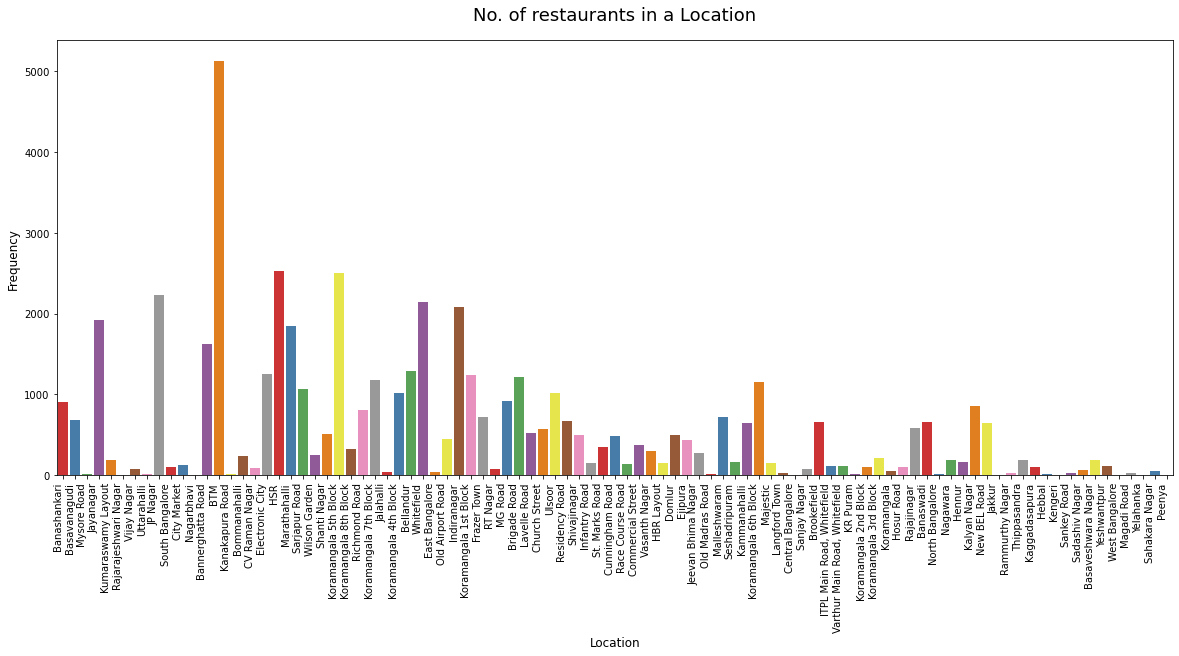

In [14]:
#Data visualization part
fig = mpl.figure(figsize=(20,8))
loc = sbn.countplot(x="location",data=zom_og, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
mpl.ylabel("Frequency",size=12)
mpl.xlabel("Location",size=12)
mpl.title('No. of restaurants in a Location',fontsize = 18,pad=20)
mpl.savefig("No. of restaurants in a Location.png")

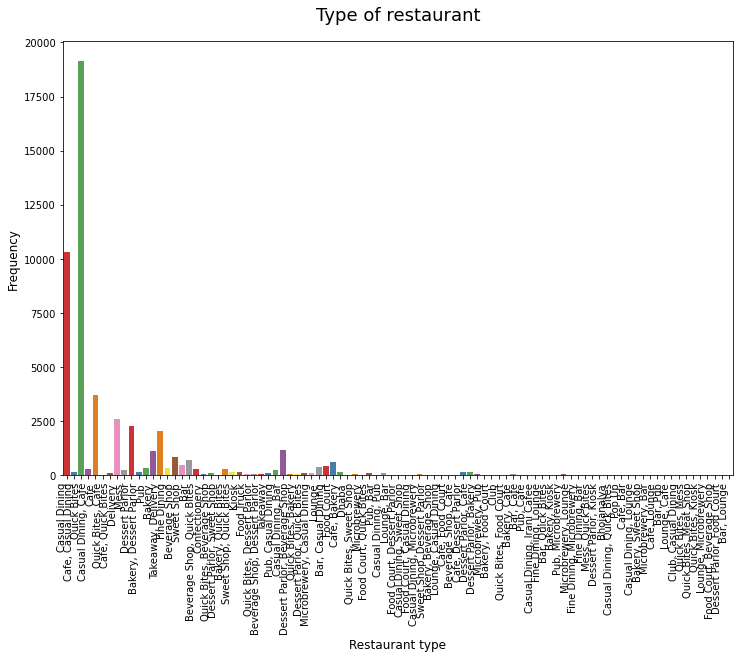

In [15]:
fig = mpl.figure(figsize=(12,8))
rest = sbn.countplot(x="rest_type",data=zom_og, palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
mpl.ylabel("Frequency",size=12)
mpl.xlabel("Restaurant type",size=12)
mpl.title('Type of restaurant',fontsize = 18 ,pad=20)
mpl.savefig('Type of restaurant.png')

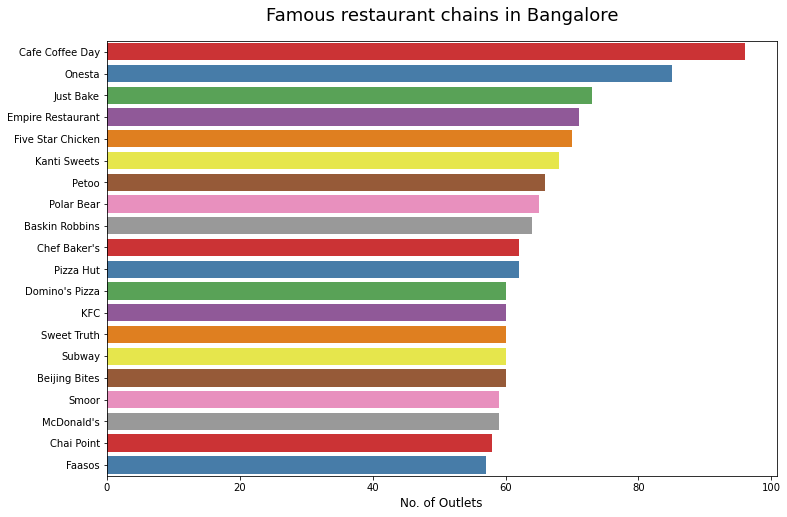

In [16]:
mpl.figure(figsize=(12,8))
chains=zom_og['name'].value_counts()[:20]
sbn.barplot(x=chains,y=chains.index,palette='Set1')
mpl.title("Famous restaurant chains in Bangalore",fontsize=18,pad=20)
mpl.xlabel("No. of Outlets",size=12)
mpl.savefig('Famous restaurant chains in Bangalore.png')

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


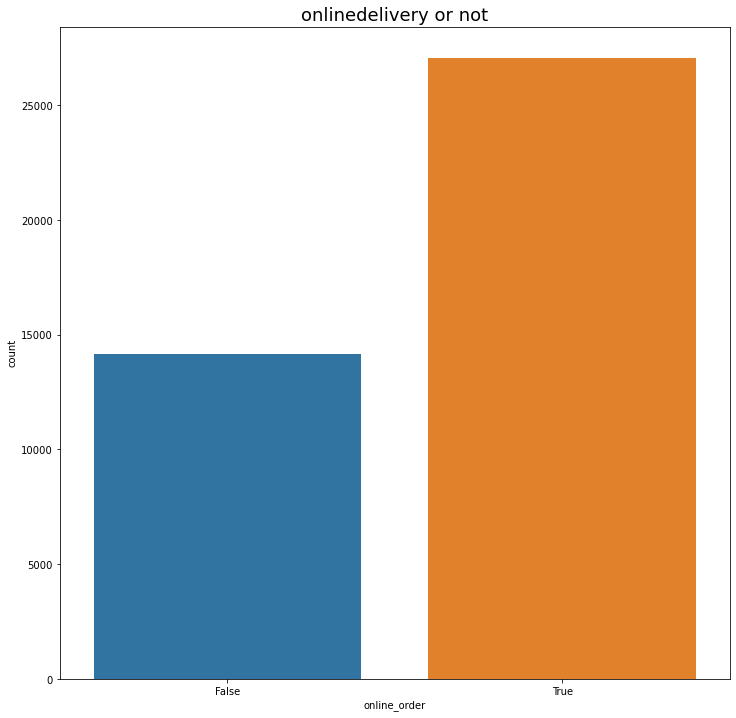

In [17]:
sbn.countplot(zom_new['online_order'])
fig = mpl.gcf()
fig.set_size_inches(12,12)
mpl.title('onlinedelivery or not',fontsize=18)
mpl.savefig("online.png")

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Booking Table in a Restaurant (allowed or not)')

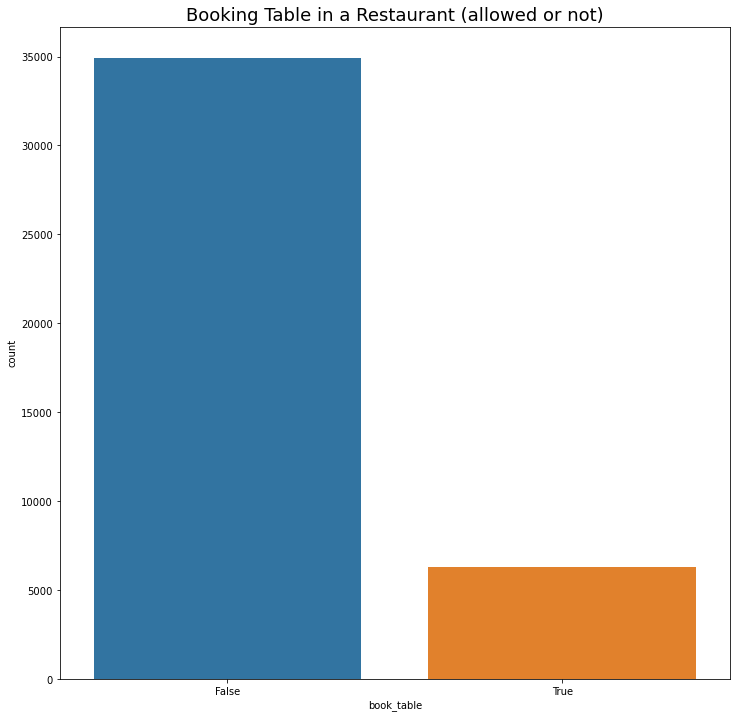

In [18]:
sbn.countplot(zom_new['book_table'])
fig = mpl.gcf()
fig.set_size_inches(12,12)
mpl.savefig("Book_Table.png")
mpl.title('Booking Table in a Restaurant (allowed or not)',fontsize=18)

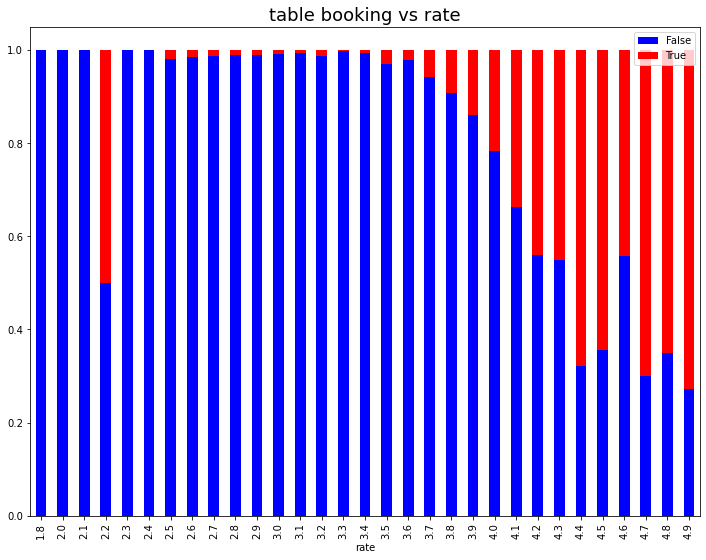

In [19]:
mpl.rcParams['figure.figsize'] = (12, 9)
Y = pds.crosstab(zom_new['rate'], zom_new['book_table'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['blue','red'])
mpl.title('table booking vs rate',fontsize = 18)
mpl.legend(loc="upper right")
mpl.savefig("Table_Booking_Rate.png")
mpl.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Location')

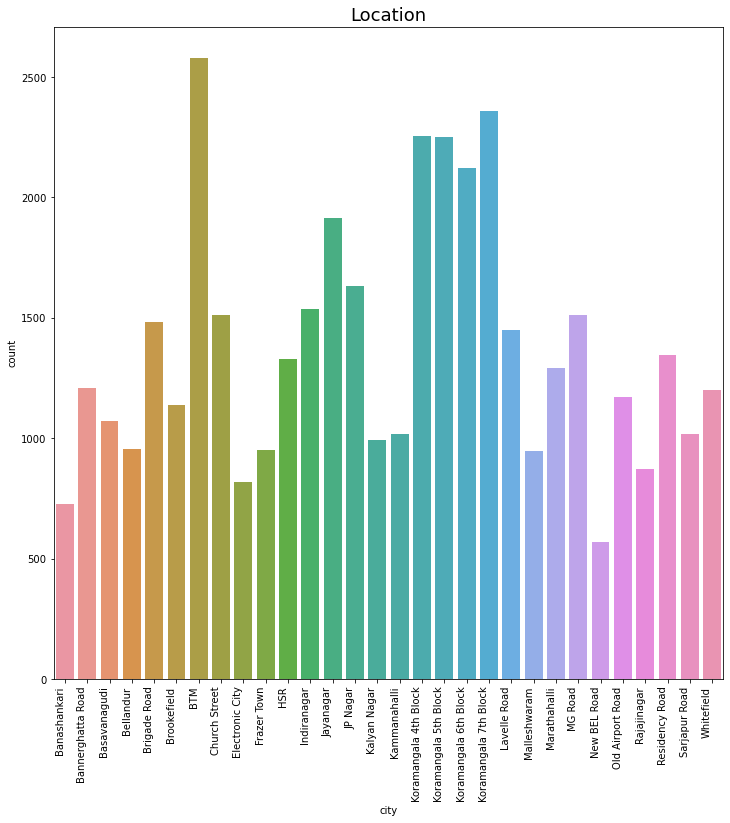

In [20]:
sbn.countplot(zom_new['city'])
sbn.countplot(zom_new['city']).set_xticklabels(sbn.countplot(zom_new['city']).get_xticklabels(), rotation=90, ha="right")
fig = mpl.gcf()
fig.set_size_inches(12,12)
mpl.savefig("Location.png")
mpl.title('Location',fontsize=18)

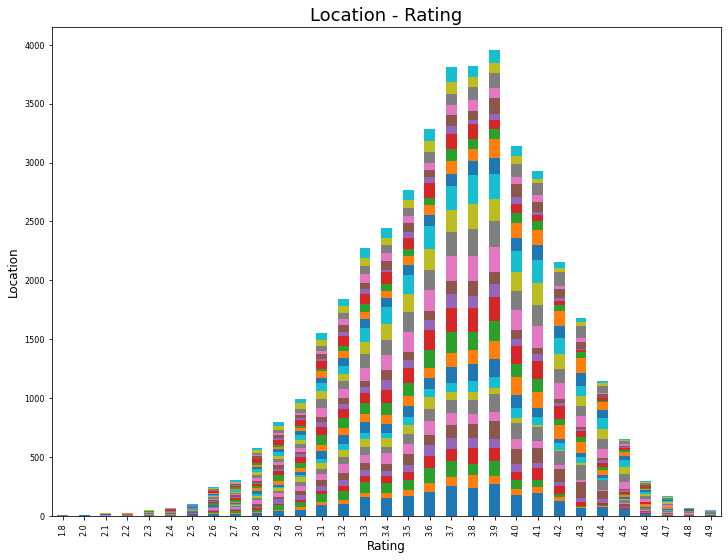

In [21]:
loc_plt=pds.crosstab(zom_new['rate'],zom_new['city'])
loc_plt.plot(kind='bar',stacked=True);
mpl.title('Location - Rating',fontsize=18)
mpl.ylabel('Location',fontsize=12)
mpl.xlabel('Rating',fontsize=12)
mpl.xticks(fontsize=8)
mpl.yticks(fontsize=8);
mpl.legend().remove();
mpl.savefig("Location Rating.png")

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Restaurant Type')

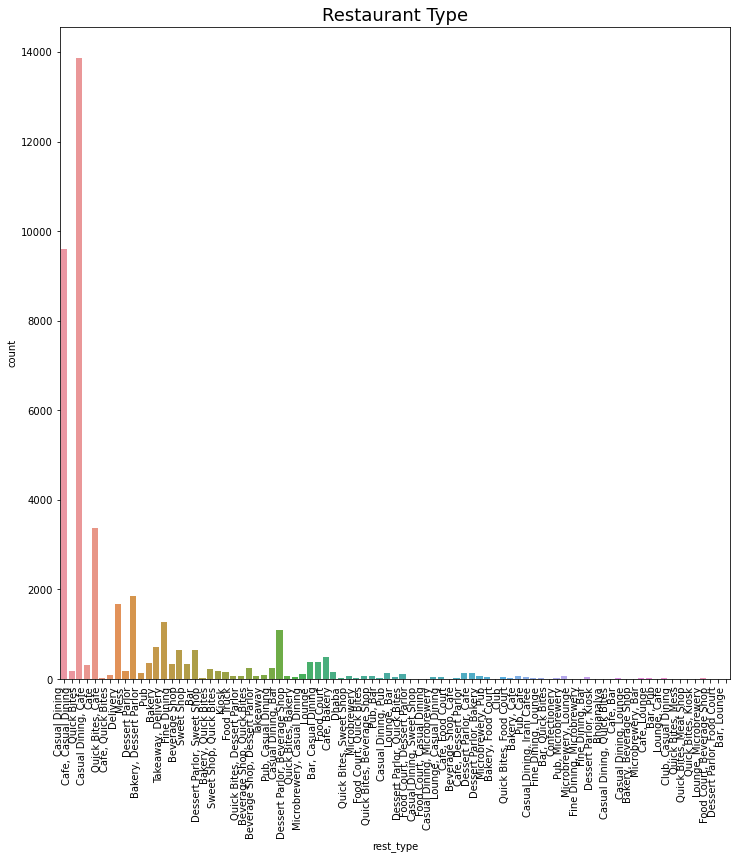

In [22]:
sbn.countplot(zom_new['rest_type'])
sbn.countplot(zom_new['rest_type']).set_xticklabels(sbn.countplot(zom_new['rest_type']).get_xticklabels(), rotation=90, ha="right")
fig = mpl.gcf()
fig.set_size_inches(12,12)
mpl.savefig("Restaurant Type.png")
mpl.title('Restaurant Type',fontsize=18)

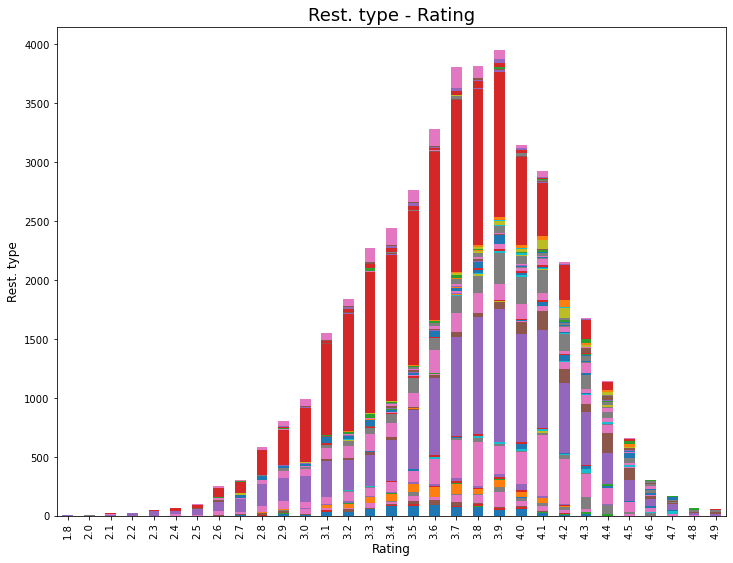

In [23]:
loc_plt=pds.crosstab(zom_new['rate'],zom_new['rest_type'])
loc_plt.plot(kind='bar',stacked=True);
mpl.title('Rest. type - Rating',fontsize=18)
mpl.ylabel('Rest. type',fontsize=12)
mpl.xlabel('Rating',fontsize=12)
mpl.xticks(fontsize=10)
mpl.yticks(fontsize=10);
mpl.legend().remove();
mpl.savefig('Rest Type-Rating.png')

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


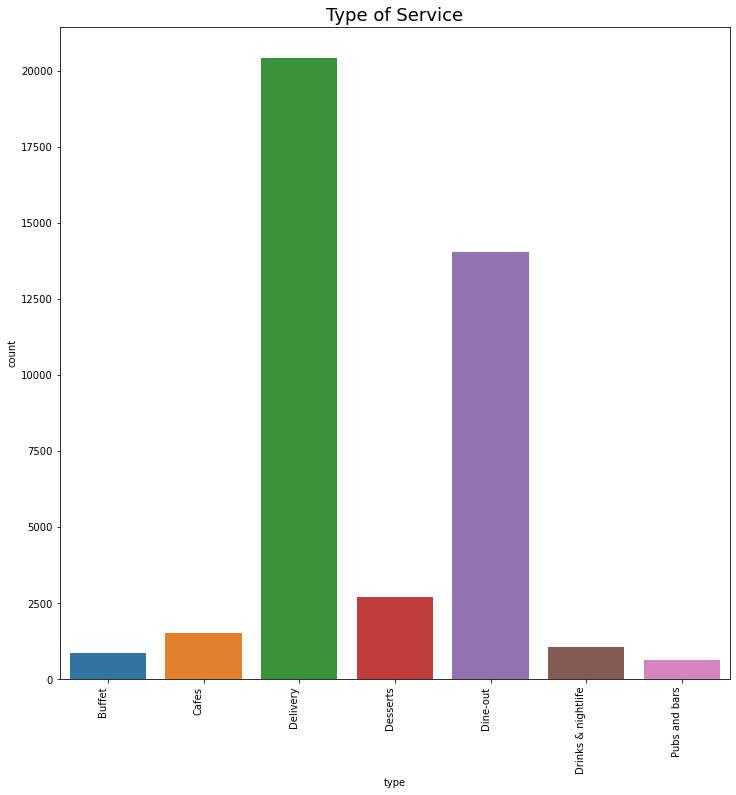

In [24]:
sbn.countplot(zom_new['type'])
sbn.countplot(zom_new['type']).set_xticklabels(sbn.countplot(zom_new['type']).get_xticklabels(), rotation=90, ha="right")
fig = mpl.gcf()
fig.set_size_inches(12,12)
mpl.title('Type of Service',fontsize=18)
mpl.savefig('Type of Service.png')

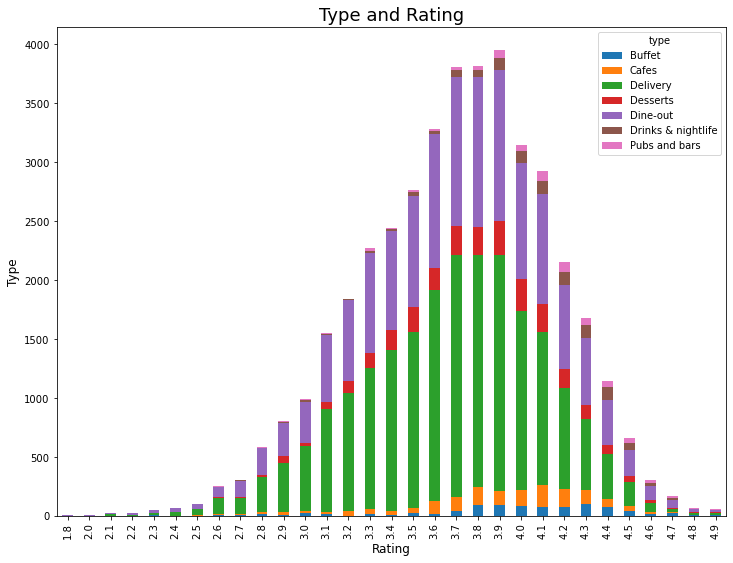

In [25]:
type_plt=pds.crosstab(zom_new['rate'],zom_new['type'])
type_plt.plot(kind='bar',stacked=True);
mpl.title('Type and Rating',fontsize=18)
mpl.ylabel('Type',fontsize=12)
mpl.xlabel('Rating',fontsize=12)
mpl.xticks(fontsize=10)
mpl.yticks(fontsize=10);
mpl.savefig('Type and Rating.png')

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


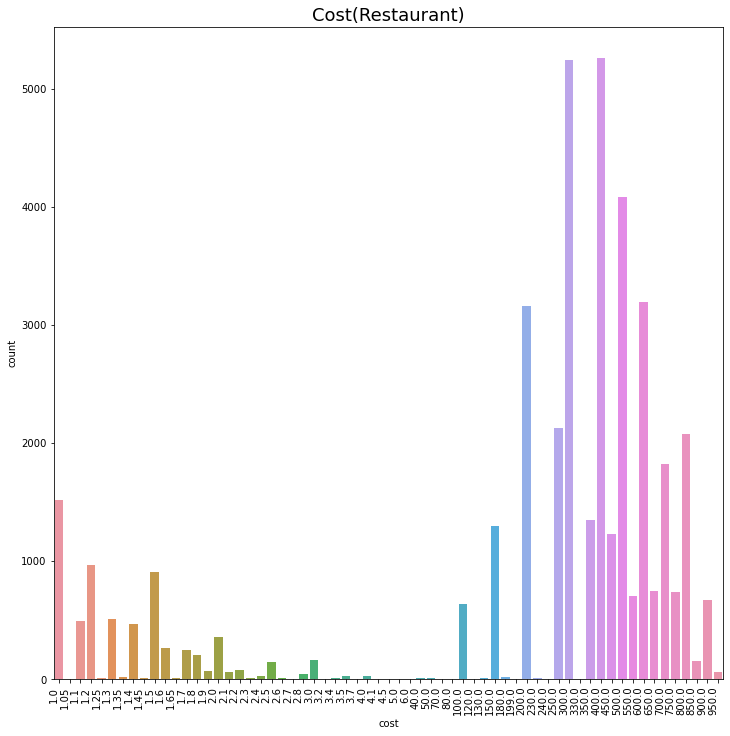

In [26]:
sbn.countplot(zom_new['cost'])
sbn.countplot(zom_new['cost']).set_xticklabels(sbn.countplot(zom_new['cost']).get_xticklabels(), rotation=90, ha="right")
fig = mpl.gcf()
fig.set_size_inches(12,12)
mpl.title('Cost(Restaurant)',fontsize=18)
mpl.savefig('Cost(Restaurant).png')